In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
tablefile_dir = "/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova"
tablefile_name = "TransientTable.csv"

tablefiles = [os.path.join(tablefile_dir, event_dir, tablefile_name) for event_dir in os.listdir(tablefile_dir) if os.path.exists(os.path.join(tablefile_dir, event_dir, tablefile_name) )]

print("\n".join(tablefiles))

/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190901ap_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190910d_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190910h_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190930s_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190930t_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S191109d_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S191110x_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S200115j_rev_0/TransientTable.csv


/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190901ap_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190910d_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190910h_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190930s_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S190930t_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S191109d_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S191110x_rev_0/TransientTable.csv
/mnt/c/Users/Public/Documents/Uni/master/masterarbeit/ampel/ampel-results/ligo-kilonova/S200115j_rev_0/TransientTable.csv


(array([380.,  16.,  42.,  24.,  11.,  28.,   8.,   3.,   1.,   2.]),
 array([4.12776062e-05, 2.38964814e-03, 4.73801868e-03, 7.08638921e-03,
        9.43475975e-03, 1.17831303e-02, 1.41315008e-02, 1.64798714e-02,
        1.88282419e-02, 2.11766124e-02, 2.35249830e-02]),
 <BarContainer object of 10 artists>)

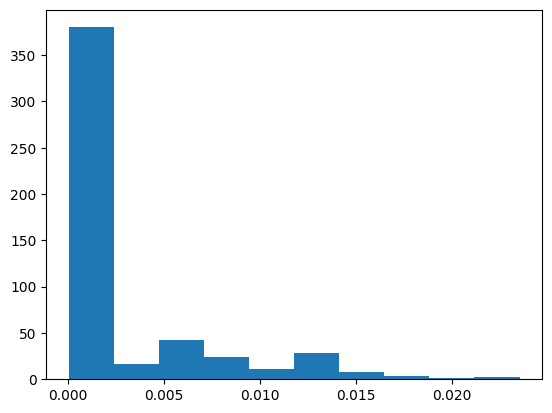

In [20]:
data = pd.DataFrame()

for file in tablefiles:
    print(file)
    df_tmp = pd.read_csv(file, sep=";")
    data = pd.concat([data, df_tmp])

data["Kilonovaness per area"] = data["Kilonovaness"] / data["Map area"]

#plt.scatter(data["Map area"], data["Kilonovaness"])
plt.hist(data["Kilonovaness per area"])